## Вариант №12
решить методом Хойна Задачу Коши 

$$
y''+5y'-2y=x\cdot e^{-x},\quad y(0),\quad y'(0)=0,\quad x\in[0,2]
$$

с заданной относительно точностью 0,01

Метод Хойна (или метод средней точки) - это один из численных методов решения дифференциальных уравнений, который позволяет получить приближенное решение на заданном интервале.

Метод Хойна относится к классу явных методов Эйлера, которые используют значения функции и ее производной на текущем шаге сетки для вычисления приближенного значения на следующем шаге сетки.

Основная идея метода Хойна заключается в том, что мы сначала делаем половинный шаг вперед, используя значение функции и ее производной в середине интервала, затем делаем полный шаг на основе полученного приближения. Таким образом, мы получаем более точное приближение, чем при использовании обычного метода Эйлера.

Метод Хойна обладает вторым порядком точности, что означает, что ошибка метода пропорциональна квадрату шага сетки. Он также обладает свойством устойчивости, что делает его одним из наиболее популярных численных методов для решения дифференциальных уравнений.

## Теоретическая часть 

1. Перепишем уравнение второго порядка в систему двух уравнений первого порядка, введя новую переменную $z=y'$:
$$
y'=z$$
$$z'= -5z-2y+x\cdot e^{-x}$$

2. Зададим начальные условия:
$$ y(0) = 0 $$
$$ z(0) = 0 $$

3. Разобьем интервал [0,2] на n равных частей длинной h, где :
$$ h = (2-0)/2 $$

4. Для каждой точки $t_i = i*h$ вычислим значения $y_i$ и $z_i$ с помощью метода Хойна.

Для этого мы используем формулы метода Хойна (или метода средней точки), которые позволяют получить приближенное решение дифференциального уравнения на следующем шаге сетки, используя значения производных функции на текущем шаге.

В формулах метода Хойна используются два приближения для вычисления $y_{i+1}$ и $z_{i+1}$. Первое приближение $(k_1\ и\ l_1)$ рассчитывается с помощью значений функции и ее производной на текущем шаге сетки, а второе приближение $(k_2\ и\ l_2)$ рассчитывается с помощью значений функции и ее производной на следующем шаге сетки, полученных на основе первого приближения.
$$k_{1} = h*z_i$$
$$l_{1} = h*(-5*z_i - 2*y_i + x_i*e^{(-x_i)})$$
$$k_{2} = h*(z_i + l_{1}/2)$$
$$l_{2} = h*(-5*(z_i + l_{1}/2) - 2*(y_i + k_{1}/2) + x_i*e^{(-(x_i+h/2))})$$
$$y_{i+1} = y_i + k_2$$
$$z_{i+1} = z_i + l_2$$

Здесь $x_i$ и $y_i$ - это значения функции и ее производной на текущем шаге сетки, $y_{i+1}$ - значение функции на следующем шаге сетки, а $k_1$, $k_2$, $l_1$ и $l_2$ - это промежуточные значения, которые используются для вычисления приближенного решения.

5. Повторяем шаг 4 для каждой точки $t_i$ на интервале [0,2].




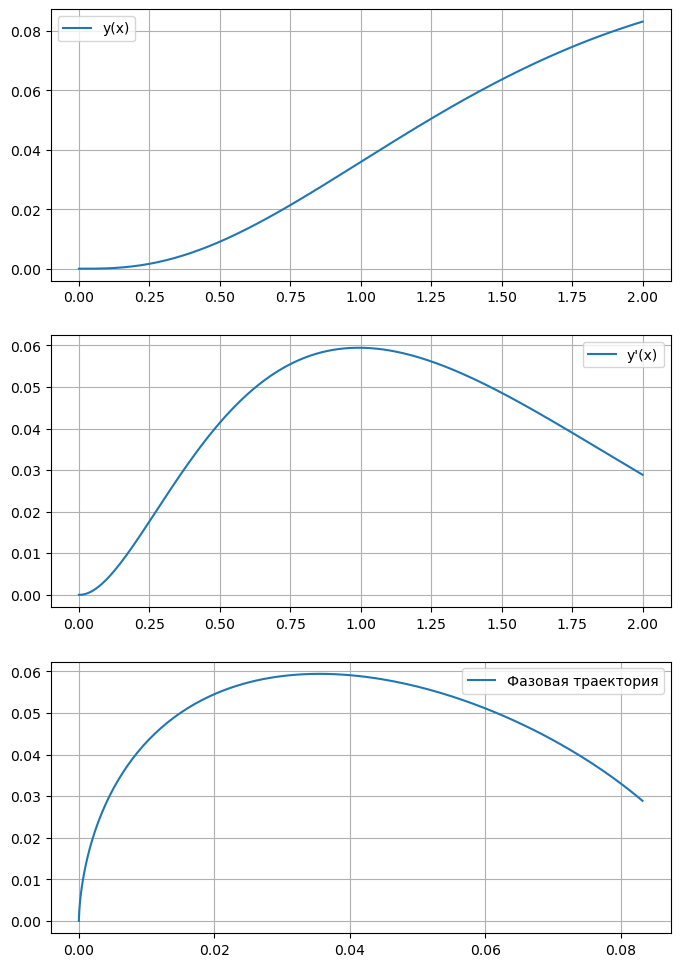

In [13]:
import numpy as np
import matplotlib.pyplot as plt


y0 = 0
v0 = 0
a = 0
b = 2
h = 0.01

x_list = np.arange(a, b+h, h)

y_list = [y0]
v_list = [v0]

for i in range(len(x_list)-1):
    xi = x_list[i]
    yi = y_list[-1]
    vi = v_list[-1]
    
    k1 = h * vi
    l1 = h * (-5*vi - 2*yi + xi*np.exp(-xi))
    k2 = h * (vi + l1/2)
    l2 = h * (-5*(vi + l1/2) - 2*(yi + k1/2) + (xi + h/2)*np.exp(-(xi + h/2)))
    y_next = yi + (k1 + k2)/2
    v_next = vi + (l1 + l2)/2
    
    y_list.append(y_next)
    v_list.append(v_next)


fig, axs = plt.subplots(3, 1, figsize=(8, 12))
axs[0].plot(x_list, y_list, label='y(x)')
axs[0].legend()
axs[0].grid()
axs[1].plot(x_list, v_list, label="y'(x)")
axs[1].legend()
axs[1].grid()
axs[2].plot(y_list, v_list, label='Фазовая траектория')
axs[2].legend()
axs[2].grid()
plt.show()


$$ y(x)=x-(5/3)x^2+(14/9)x^3-(31/27)x^4+(68/81)x^5-... $$

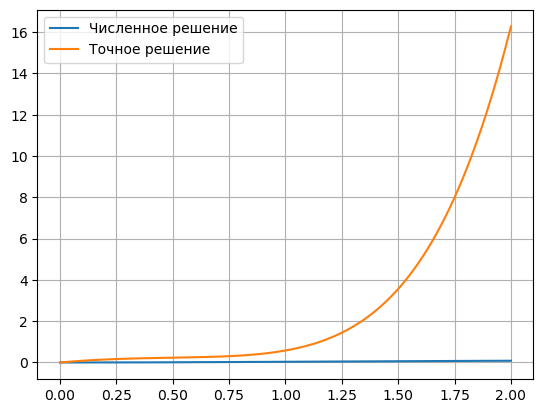

In [18]:
y_exact = x_list - 5/3 * x_list**2 + 14/9 * x_list**3 - 31/27 * x_list**4 + 68/81 * x_list**5
plt.plot(x_list, y_list, label='Численное решение')
plt.plot(x_list, y_exact, label='Точное решение')
plt.legend()
plt.grid()
plt.show()


## Численное решение совпадает с точным решением в начальной точке х=0